In [67]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

In [68]:
def init_bell(x, d0, sigma=0.05): #To make a kind of bell curve -> continuous ditribution centered in d0
    return np.exp(-0.5*((x-d0)**2)/sigma**2)

In [78]:
def init_jump(x, d0): #To make a piecewise-constant function with a discontinuity in d0 (1 before, 0 after)
    u = np.zeros_like(x, dtype=float)
    for i in range(u.shape[0]):
       if (x[i]<d0):
           u[i] = 1
    return u

In [147]:
def exact(init, x, params, tf):
    tf = np.ones_like(x)*tf
    x0 = x-tf
    u0 = init(x0, params)

    return u0

In [133]:
class Mesh:
    def __init__(self, a_, b_, Nx_, cfl_):
        self.a = a_
        self.b = b_
        self.Nx = Nx_
        self.dx = (self.b - self.a)/(self.Nx)
        self.grid = self.grid_offset()
        self.Dx_r = self.Dx_toright()
        self.cfl = cfl_
        self.dt = self.cfl*self.dx

    def grid_offset(self):
        x = []
        for j in range(self.Nx+1):
            x.append((j)*self.dx -self.a)
        return np.array(x)
    
    def Dx_toright(self):  #For a displacement from left to right
        ret = sparse.diags([np.ones(self.Nx+1),-np.ones(self.Nx)],
                           [0,-1], shape=(self.Nx+1,self.Nx+1), format="lil")
        ret[0,-1] = 1
        return ret/self.dx
    
    def Iter_Mat(self, theta, adaptive=False):
        Id = sparse.identity(self.Nx+1, format="lil")

        if adaptive==False:
            return Id + theta * self.dt * self.Dx_r

        elif adaptive==True:
            if theta.size != self.Nx+1:
                print("parameter theta does not have a correct size")
            thetas = sparse.diags(theta, shape=(self.Nx+1,self.Nx+1))
            return Id + theta + self.dt * self.Dx_r
    

In [71]:
def L2_norm(u):
    ret = np.sum(u**2)
    return np.sqrt(ret)

In [ ]:
def compare_L2(u_exact, u_num):
    return np.sum(np.sqrt(u_exact**2 + u_num**2))

$$
(Id + \theta\Delta t \partial_x)u^{n+1} = u^n -\Delta t(1-\theta)\partial_x u^n
$$

---------------------------------------------------------------------------------------------------------

In [72]:
def iterate_theta(u0, mesh, theta, tmax=0.1):
    t = 0
    u = u0.copy()
    A = mesh.Iter_Mat(theta)
    coef = mesh.dt*(1-theta)
    
    while (t<tmax):
        t += mesh.dt
        b = u - coef*(mesh.Dx_r @ u)
        u, _ = gmres(A, b)

    return u

In [81]:
def plot_thetas(u0, mesh, theta, ax, tmax=0.1):
    for theta in thetas:
        ax.plot(mesh.grid, iterate_theta(u0, mesh, theta, tmax), label=f"{theta}")
    ax.legend()


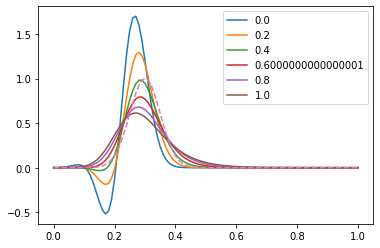

In [156]:
fig, ax = plt.subplots()
M = Mesh(0,1,100,5)
thetas = np.linspace(0,1,6)
plot_thetas(init_bell(M.grid, 0.2), M, thetas, ax)
ax.plot(M.grid, exact(init_bell, M.grid, 0.2, 0.1), "--")

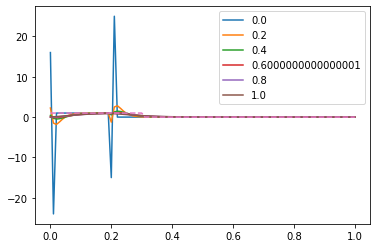

In [159]:
fig, ax = plt.subplots()
thetas = np.linspace(0,1,6)
plot_thetas(init_jump(M.grid, 0.2), M, [0.], ax)
ax.plot(M.grid, exact(init_jump, M.grid, 0.2, 0.1), "--")

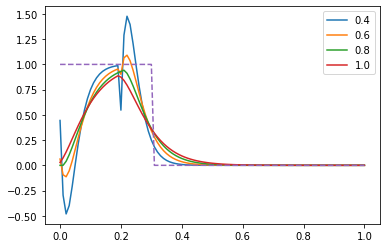

In [160]:
fig, ax = plt.subplots()
thetas = np.linspace(0.4,1,4)
plot_thetas(init_jump(M.grid, 0.2), M, [0.], ax)
ax.plot(M.grid, exact(init_jump, M.grid, 0.2, 0.1), "--")

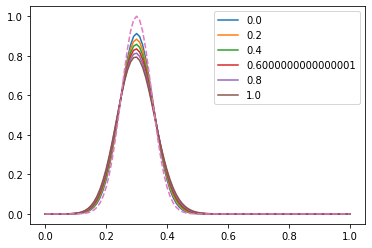

In [161]:
fig, ax = plt.subplots()
M = Mesh(0,1,100,.5)
thetas = np.linspace(0,1,6)
plot_thetas(init_bell(M.grid, 0.2), M, thetas, ax)
ax.plot(M.grid, exact(init_bell, M.grid, 0.2, 0.1), "--")

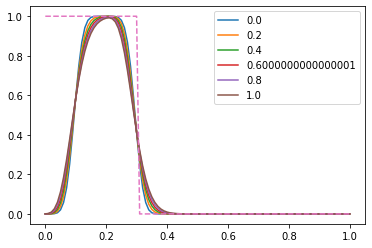

In [162]:
fig, ax = plt.subplots()
M = Mesh(0,1,100,.5)
thetas = np.linspace(0,1,6)
plot_thetas(init_jump(M.grid, 0.2), M, [0.], ax)
ax.plot(M.grid, exact(init_jump, M.grid, 0.2, 0.1), "--")

In [ ]:
"""def theta_choice(theta_st, theta, ue_0, ue_1, epsilon=1e-6):
    if np.abs(ue_1 - ue_0) > epsilon:
        pass
    else:
        return theta_st

def SATh_Scheme(mesh, u0, theta_st, theta_min, tmax=0.1):
"""